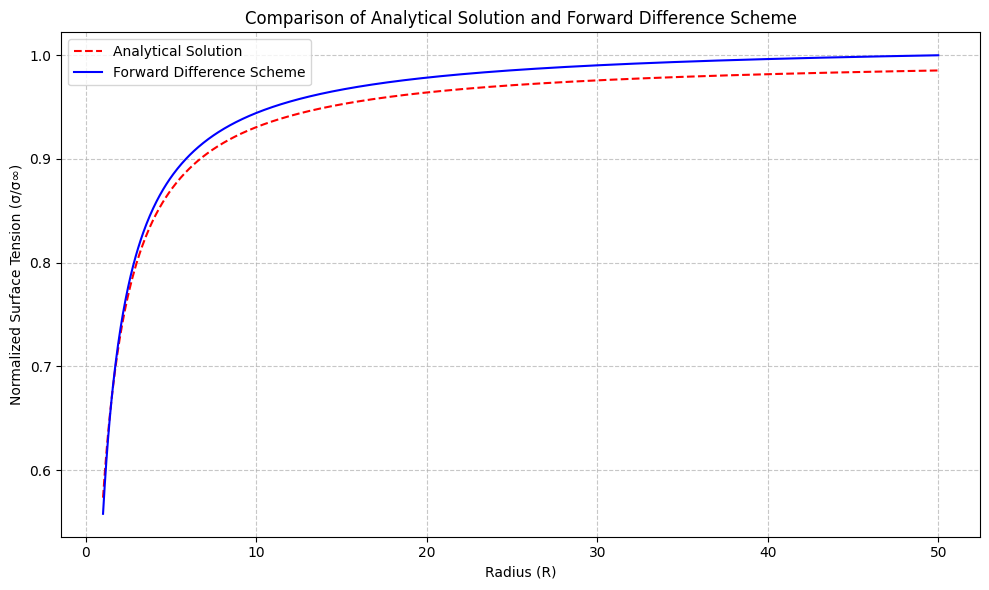

In [1]:
import numpy as np
import matplotlib.pyplot as plt


delta_inf = 0.372  # (assumed constant value of Tolman length from Paper)
sigma_inf = 1.0  # Surface tension at flat surface (R -> ∞)
r_min = 1.0
r_max = 50.0
num_points = 1000


r = np.linspace(r_min, r_max, num_points)

# --- Analytical Solution ---
sigma_ratio_analytical = 1 / (1 + 2 * delta_inf / r)

# --- Forward Difference Scheme ---
sigma_ratio_fd = np.zeros_like(r)
sigma_ratio_fd[0] = 1 - 2 * delta_inf / r_min  # Boundary condition for small r

# Define the function f(r, delta)
def f(r, delta):
    numerator = 2 * (delta * r**2 + delta**2 + delta**3 / 3)
    denominator = r * (r**3 + 2 * delta * r**2 + 2 * delta**2 * r + (2 * delta**3) / 3)
    return numerator / denominator

# Solve using the forward finite difference scheme
for i in range(num_points - 1):
    h = r[i + 1] - r[i]
    sigma_ratio_fd[i + 1] = sigma_ratio_fd[i] * (1 + h * f(r[i], delta_inf))

# Normalize the values to ensure sigma_ratio approaches 1 for large r
sigma_ratio_fd = sigma_ratio_fd / sigma_ratio_fd[-1]

plt.figure(figsize=(10, 6))
plt.plot(r, sigma_ratio_analytical, label="Analytical Solution", color='red', linestyle='--')
plt.plot(r, sigma_ratio_fd, label="Forward Difference Scheme", color='blue', linestyle='-')
plt.xlabel("Radius (R)")
plt.ylabel("Normalized Surface Tension (σ/σ∞)")
plt.title("Comparison of Analytical Solution and Forward Difference Scheme")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()
